In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('athletes.csv')
data.head()


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|


In [22]:
!pip install mlflow codecarbon feast


  Using cached feast-0.50.0-py2.py3-none-any.whl.metadata (36 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 8.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 33.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.7/431.7 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 52.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/4

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import mlflow
import mlflow.sklearn
from codecarbon import EmissionsTracker
import warnings
warnings.filterwarnings('ignore')

## Data Cleaning

In [19]:
data_v2 = data.copy()

print(f"Available columns: {list(data_v2.columns)}")

available_columns = list(data_v2.columns)
required_columns = ['region','age','weight','height','howlong','gender','eat',
                   'background','experience','schedule','deadlift','candj','snatch','backsq']

if 'train' in available_columns:
    required_columns.append('train')

subset_columns = list(set([col for col in required_columns if col in available_columns]))

print(f"Using these columns for dropna: {subset_columns}")

data_v2 = data_v2.dropna(subset=subset_columns)

columns_to_drop = ['affiliate','team','name','athlete_id','fran','helen','grace',
                  'filthy50','fgonebad','run400','run5k','pullups','train']
existing_columns_to_drop = [col for col in columns_to_drop if col in data_v2.columns]

print(f"Dropping these columns: {existing_columns_to_drop}")
data_v2 = data_v2.drop(columns=existing_columns_to_drop)

data_v2 = data_v2[data_v2['weight'] < 1500]
data_v2 = data_v2[data_v2['gender'] != '--']
data_v2 = data_v2[data_v2['age'] >= 18]
data_v2 = data_v2[(data_v2['height'] < 96) & (data_v2['height'] > 48)]

data_v2 = data_v2[(data_v2['deadlift'] > 0) & (data_v2['deadlift'] <= 1105)|((data_v2['gender'] == 'Female')
                 & (data_v2['deadlift'] <= 636))]
data_v2 = data_v2[(data_v2['candj'] > 0) & (data_v2['candj'] <= 395)]
data_v2 = data_v2[(data_v2['snatch'] > 0) & (data_v2['snatch'] <= 496)]
data_v2 = data_v2[(data_v2['backsq'] > 0) & (data_v2['backsq'] <= 1069)]

decline_dict = {'Decline to answer|': np.nan}
data_v2 = data_v2.replace(decline_dict)
data_v2 = data_v2.dropna(subset=['background','experience','schedule','howlong','eat'])

data = data_v2.copy()

print(f"Cleaned dataset shape: {data.shape}")
print(f"Removed {len(data) - len(data)} rows during cleaning")
print(f"Removed {len(data.columns) - len(data.columns)} columns during cleaning")
print(f"Final columns: {list(data.columns)}")

Available columns: ['region', 'gender', 'age', 'height', 'weight', 'candj', 'snatch', 'deadlift', 'backsq', 'eat', 'background', 'experience', 'schedule', 'howlong', 'total_lift', 'timestamp', 'athlete_id']
Using these columns for dropna: ['experience', 'snatch', 'howlong', 'region', 'eat', 'schedule', 'weight', 'backsq', 'background', 'deadlift', 'height', 'gender', 'age', 'candj']
Dropping these columns: ['athlete_id']
Cleaned dataset shape: (30029, 16)
Removed 0 rows during cleaning
Removed 0 columns during cleaning
Final columns: ['region', 'gender', 'age', 'height', 'weight', 'candj', 'snatch', 'deadlift', 'backsq', 'eat', 'background', 'experience', 'schedule', 'howlong', 'total_lift', 'timestamp']


## Feature Engineering

In [20]:
lifting_cols = ['deadlift', 'candj', 'snatch', 'backsq']
data['total_lift'] = data[lifting_cols].sum(axis=1)

print(f"Target variable 'total_lift' created")
print(f"Total lift statistics:")
print(data['total_lift'].describe())

# Add timestamp for Feast (required for feature store)
from datetime import datetime, timedelta
import random

# Create synthetic timestamps (in practice, this would be real event timestamps)
base_time = datetime.now() - timedelta(days=30)
data['timestamp'] = [base_time + timedelta(hours=random.randint(0, 720)) for _ in range(len(data))]

# Create athlete_id for entity (required for Feast)
data['athlete_id'] = range(1, len(data) + 1)

print(f"Added timestamp and athlete_id columns for Feast feature store")


Target variable 'total_lift' created
Total lift statistics:
count    30029.000000
mean      1017.645409
std        277.682895
min          4.000000
25%        805.000000
50%       1040.000000
75%       1224.000000
max       2135.000000
Name: total_lift, dtype: float64
Added timestamp and athlete_id columns for Feast feature store


In [21]:
import os
from pathlib import Path

# Create feature store directory structure
feature_repo_path = Path("feature_store")
feature_repo_path.mkdir(exist_ok=True)

# Create feature_store.yaml configuration
feature_store_config = """
project: athlete_performance
registry: data/registry.db
provider: local
online_store:
    type: sqlite
    path: data/online_store.db
offline_store:
    type: file
"""

with open(feature_repo_path / "feature_store.yaml", "w") as f:
    f.write(feature_store_config)

print("Created feature_store.yaml configuration")

# Create feature definitions file
feature_definitions = '''
from feast import Entity, FeatureView, Field, FileSource
from feast.types import Float32, Int64
from datetime import timedelta

# Define the athlete entity
athlete = Entity(
    name="athlete_id",
    join_keys=["athlete_id"],
    description="Unique identifier for athletes"
)

# Data source
athlete_source = FileSource(
    path="../athletes_features.parquet",
    timestamp_field="timestamp",
)

# Feature View 1: Technical Performance Features
technical_features = FeatureView(
    name="technical_features",
    entities=[athlete],
    ttl=timedelta(days=365),
    schema=[
        Field(name="snatch_to_bodyweight", dtype=Float32),
        Field(name="candj_to_bodyweight", dtype=Float32),
        Field(name="technical_ratio", dtype=Float32),
        Field(name="technical_index", dtype=Float32),
        Field(name="snatch_percentile", dtype=Float32),
        Field(name="candj_percentile", dtype=Float32),
    ],
    online=True,
    source=athlete_source,
    tags={"version": "v1", "category": "technical"}
)

# Feature View 2: Strength Performance Features  
strength_features = FeatureView(
    name="strength_features",
    entities=[athlete],
    ttl=timedelta(days=365),
    schema=[
        Field(name="deadlift_to_bodyweight", dtype=Float32),
        Field(name="backsq_to_bodyweight", dtype=Float32),
        Field(name="strength_ratio", dtype=Float32),
        Field(name="power_index", dtype=Float32),
        Field(name="deadlift_percentile", dtype=Float32),
        Field(name="backsq_percentile", dtype=Float32),
    ],
    online=True,
    source=athlete_source,
    tags={"version": "v2", "category": "strength"}
)

# Feature View 3: Athlete Profile Features
profile_features = FeatureView(
    name="profile_features", 
    entities=[athlete],
    ttl=timedelta(days=365),
    schema=[
        Field(name="age_normalized", dtype=Float32),
        Field(name="bmi", dtype=Float32),
        Field(name="height_weight_ratio", dtype=Float32),
        Field(name="experience_encoded", dtype=Int64),
        Field(name="background_encoded", dtype=Int64),
        Field(name="region_encoded", dtype=Int64),
    ],
    online=True,
    source=athlete_source,
    tags={"version": "common", "category": "profile"}
)
'''

with open(feature_repo_path / "features.py", "w") as f:
    f.write(feature_definitions)

print("Created features.py with feature definitions")


Created feature_store.yaml configuration
Created features.py with feature definitions


In [22]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.preprocessing import LabelEncoder

# Create comprehensive feature dataset
features_data = data.copy()

# Technical Performance Features (Version 1)
features_data['snatch_to_bodyweight'] = data['snatch'] / data['weight']
features_data['candj_to_bodyweight'] = data['candj'] / data['weight'] 
features_data['technical_ratio'] = data['snatch'] / data['candj']
features_data['technical_index'] = (data['snatch'] + data['candj']) / 2

# Calculate percentiles for technical lifts
features_data['snatch_percentile'] = data['snatch'].rank(pct=True) * 100
features_data['candj_percentile'] = data['candj'].rank(pct=True) * 100

# Strength Performance Features (Version 2)
features_data['deadlift_to_bodyweight'] = data['deadlift'] / data['weight']
features_data['backsq_to_bodyweight'] = data['backsq'] / data['weight']
features_data['strength_ratio'] = data['deadlift'] / data['backsq'] 
features_data['power_index'] = (data['deadlift'] + data['backsq']) / 2

# Calculate percentiles for strength lifts
features_data['deadlift_percentile'] = data['deadlift'].rank(pct=True) * 100
features_data['backsq_percentile'] = data['backsq'].rank(pct=True) * 100

# Profile Features (Common)
features_data['age_normalized'] = (data['age'] - data['age'].mean()) / data['age'].std()
features_data['bmi'] = data['weight'] / ((data['height'] * 0.0254) ** 2)  # Convert inches to meters
features_data['height_weight_ratio'] = data['height'] / data['weight']


# Save feature data for Feast
feature_columns = [
    'athlete_id', 'timestamp', 'total_lift',
    # Technical features
    'snatch_to_bodyweight', 'candj_to_bodyweight', 'technical_ratio', 
    'technical_index', 'snatch_percentile', 'candj_percentile',
    # Strength features  
    'deadlift_to_bodyweight', 'backsq_to_bodyweight', 'strength_ratio',
    'power_index', 'deadlift_percentile', 'backsq_percentile',
    # Profile features
    'age_normalized', 'bmi', 'height_weight_ratio'
]

feast_data = features_data[feature_columns].copy()
feast_data.to_parquet("athletes_features.parquet", index=False)

print(f"Created feature dataset with {len(feature_columns)} columns")
print("Feature columns:", feature_columns[3:])  # Skip athlete_id, timestamp, total_lift


Created feature dataset with 18 columns
Feature columns: ['snatch_to_bodyweight', 'candj_to_bodyweight', 'technical_ratio', 'technical_index', 'snatch_percentile', 'candj_percentile', 'deadlift_to_bodyweight', 'backsq_to_bodyweight', 'strength_ratio', 'power_index', 'deadlift_percentile', 'backsq_percentile', 'age_normalized', 'bmi', 'height_weight_ratio']


## 2 Feature Store

In [24]:
import os
from pathlib import Path

os.makedirs("feature_repo", exist_ok=True)

# Updated feature_store.yaml
feature_store_config = """
project: athlete_performance
registry: data/registry.db
provider: local
online_store:
    type: sqlite
    path: data/online_store.db
"""

with open("feature_repo/feature_store.yaml", "w") as f:
    f.write(feature_store_config)

# Updated feature definitions
feature_definitions = '''
from feast import FeatureView, FileSource, Entity, Field
from feast.types import Float32, Int64
from datetime import timedelta
import os

# Entity
athlete = Entity(name="athlete_id", join_keys=["athlete_id"])

# Data source
if os.path.exists("../athletes_data.parquet"):
    file_source = FileSource(path="../athletes_data.parquet", timestamp_field="timestamp")
else:
    file_source = FileSource(path="../athletes_data.csv", timestamp_field="timestamp")

# Feature View 1: Relative Performance Metrics
relative_performance = FeatureView(
    name="relative_performance",
    entities=[athlete],
    ttl=timedelta(days=365),
    schema=[
        Field(name="snatch_to_bodyweight", dtype=Float32),
        Field(name="candj_to_bodyweight", dtype=Float32),
        Field(name="technical_ratio", dtype=Float32),
        Field(name="snatch_percentile", dtype=Float32),
    ],
    online=True,
    source=file_source,
)

# Feature View 2: Physical Foundation  
physical_foundation = FeatureView(
    name="physical_foundation",
    entities=[athlete],
    ttl=timedelta(days=365),
    schema=[
        Field(name="deadlift", dtype=Float32),
        Field(name="backsq", dtype=Float32), 
        Field(name="height", dtype=Float32),
        Field(name="weight", dtype=Float32),
        Field(name="bmi", dtype=Float32),
    ],
    online=True,
    source=file_source,
)
'''

with open("feature_repo/features.py", "w") as f:
    f.write(feature_definitions)

print("Feature store configuration created")


Feature store configuration created


In [25]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
import random

# Create comprehensive feature dataset
features_data = data.copy()


# Relative Performance Features (Version 1)
features_data['snatch_to_bodyweight'] = data['snatch'] / data['weight']
features_data['candj_to_bodyweight'] = data['candj'] / data['weight'] 
features_data['technical_ratio'] = data['snatch'] / data['candj']
features_data['snatch_percentile'] = data['snatch'].rank(pct=True) * 100

# Physical Foundation Features (Version 2) 
# deadlift, backsq, height, weight already exist
features_data['bmi'] = data['weight'] / ((data['height'] * 0.0254) ** 2)  # Convert inches to meters

# Add required timestamp and athlete_id for Feast
base_time = datetime.now() - timedelta(days=30)
features_data['timestamp'] = [base_time + timedelta(hours=random.randint(0, 720)) for _ in range(len(data))]
features_data['athlete_id'] = range(1, len(data) + 1)

# Target variable
features_data['total_lift'] = data[['deadlift', 'candj', 'snatch', 'backsq']].sum(axis=1)

# Save data for Feast (try parquet, fallback to CSV)
feature_columns = [
    'athlete_id', 'timestamp', 'total_lift',
    # Relative Performance (V1)
    'snatch_to_bodyweight', 'candj_to_bodyweight', 'technical_ratio', 'snatch_percentile',
    # Physical Foundation (V2)
    'deadlift', 'backsq', 'height', 'weight', 'bmi'
]

feast_data = features_data[feature_columns].copy()

try:
    feast_data.to_parquet("athletes_data.parquet", index=False)
    print("✅ Saved as athletes_data.parquet")
except:
    feast_data.to_csv("athletes_data.csv", index=False)
    print("✅ Saved as athletes_data.csv (parquet failed)")

print(f"Created feature dataset with {len(feature_columns)} columns")
print("Features:")
print("- V1 (Relative Performance):", ['snatch_to_bodyweight', 'candj_to_bodyweight', 'technical_ratio', 'snatch_percentile'])
print("- V2 (Physical Foundation):", ['deadlift', 'backsq', 'height', 'weight', 'bmi'])


✅ Saved as athletes_data.parquet
Created feature dataset with 12 columns
Features:
- V1 (Relative Performance): ['snatch_to_bodyweight', 'candj_to_bodyweight', 'technical_ratio', 'snatch_percentile']
- V2 (Physical Foundation): ['deadlift', 'backsq', 'height', 'weight', 'bmi']


In [26]:
# Feature version 1: Relative Performance (engineered ratios & percentiles)
features_v1 = features_data[["snatch_to_bodyweight", "candj_to_bodyweight", "technical_ratio", 
                           "snatch_percentile"]].copy()

# Feature version 2: Physical Foundation (raw measurements + body comp)
features_v2 = features_data[["deadlift", "backsq", "height", "weight", "bmi"]].copy()

# Target variable (REGRESSION - predicting total_lift)
target = features_data["total_lift"].copy()

print("Feature Version 1 (Relative Performance):", features_v1.columns.tolist())
print("Feature Version 2 (Physical Foundation):", features_v2.columns.tolist())
print(f"Target: total_lift (range: {target.min():.0f} - {target.max():.0f})")


Feature Version 1 (Relative Performance): ['snatch_to_bodyweight', 'candj_to_bodyweight', 'technical_ratio', 'snatch_percentile']
Feature Version 2 (Physical Foundation): ['deadlift', 'backsq', 'height', 'weight', 'bmi']
Target: total_lift (range: 4 - 2135)


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from codecarbon import EmissionsTracker
import mlflow
import mlflow.sklearn

mlflow.set_experiment("Performance_vs_Physical")

experiment_log = []

def train_with_tracking(X, y, feature_version, hp_version, **model_params):
    """Training function with tracking"""
    tracker = EmissionsTracker()
    tracker.start()
    
    with mlflow.start_run():
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train model
        model = RandomForestRegressor(**model_params, random_state=42)
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_test)
        
        # Metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Stop tracking
        emissions = tracker.stop()
        
        # Log to MLflow
        mlflow.log_param("feature_version", feature_version)
        mlflow.log_param("hyperparameters", hp_version)
        mlflow.log_params(model_params)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2_score", r2)
        mlflow.log_metric("carbon_emissions", emissions)
        mlflow.sklearn.log_model(model, "model")
        
        # Store results
        result = {
            "run_name": f"{feature_version}_{hp_version}",
            "feature_version": feature_version,
            "hyperparameters": hp_version,
            "rmse": rmse,
            "r2_score": r2,
            "emissions_kg": emissions
        }
        experiment_log.append(result)
        
        print(f"{feature_version}_{hp_version}: RMSE={rmse:.2f}, R²={r2:.4f}, Emissions={emissions:.6f}kg")
        return result


2025/07/17 17:08:27 INFO mlflow.tracking.fluent: Experiment with name 'Performance_vs_Physical' does not exist. Creating a new experiment.


## 4 Combination

In [28]:
# Updated hyperparameter sets
hp1 = {"n_estimators": 150, "max_depth": 12, "min_samples_split": 5}
hp2 = {"n_estimators": 250, "max_depth": 18, "min_samples_split": 3}

# Run experiments
result1 = train_with_tracking(features_v1, target, "v1_relative_performance", "hp1", **hp1)
result2 = train_with_tracking(features_v1, target, "v1_relative_performance", "hp2", **hp2)
result3 = train_with_tracking(features_v2, target, "v2_physical_foundation", "hp1", **hp1)
result4 = train_with_tracking(features_v2, target, "v2_physical_foundation", "hp2", **hp2)

print("\n=== All Experiments Complete ===")


[codecarbon WARNING @ 17:08:27] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon WARNING @ 17:08:27] Error while trying to count physical CPUs: [Errno 2] No such file or directory: 'lscpu'. Defaulting to 1.
[codecarbon INFO @ 17:08:27] [setup] RAM Tracking...
[codecarbon INFO @ 17:08:27] [setup] CPU Tracking...
[codecarbon WARNING @ 17:08:27] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 17:08:27] CPU Model on constant consumption mode: Apple M1 Pro
[codecarbon WARNING @ 17:08:27] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 17:08:27] [setup] GPU Tracking...
[codecarbon INFO @ 17:08:27] No GPU found.
[codecarbon INFO @ 17:08:27] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global const

v1_relative_performance_hp1: RMSE=67.07, R²=0.9414, Emissions=0.000005kg


[codecarbon WARNING @ 17:08:37] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 17:08:37] CPU Model on constant consumption mode: Apple M1 Pro
[codecarbon WARNING @ 17:08:37] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 17:08:37] [setup] GPU Tracking...
[codecarbon INFO @ 17:08:37] No GPU found.
[codecarbon INFO @ 17:08:37] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 17:08:37] >>> Tracker's metadata:
[codecarbon INFO @ 17:08:37]   Platform system: macOS-14.4-arm64-arm-64bit
[codecarbon INFO @ 17:08:37]   Python version: 3.12.2
[codecarbon INFO @ 17:08:37]   CodeCarbon version: 3.0.4
[codecarbon INFO @ 17:08:37]   Available 

v1_relative_performance_hp2: RMSE=70.43, R²=0.9354, Emissions=0.000010kg


[codecarbon WARNING @ 17:08:53] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 17:08:53] CPU Model on constant consumption mode: Apple M1 Pro
[codecarbon WARNING @ 17:08:53] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 17:08:53] [setup] GPU Tracking...
[codecarbon INFO @ 17:08:53] No GPU found.
[codecarbon INFO @ 17:08:53] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 17:08:53] >>> Tracker's metadata:
[codecarbon INFO @ 17:08:53]   Platform system: macOS-14.4-arm64-arm-64bit
[codecarbon INFO @ 17:08:53]   Python version: 3.12.2
[codecarbon INFO @ 17:08:53]   CodeCarbon version: 3.0.4
[codecarbon INFO @ 17:08:53]   Available 

v2_physical_foundation_hp1: RMSE=42.34, R²=0.9767, Emissions=0.000005kg


[codecarbon WARNING @ 17:09:05] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 17:09:05] CPU Model on constant consumption mode: Apple M1 Pro
[codecarbon WARNING @ 17:09:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 17:09:05] [setup] GPU Tracking...
[codecarbon INFO @ 17:09:05] No GPU found.
[codecarbon INFO @ 17:09:05] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 17:09:05] >>> Tracker's metadata:
[codecarbon INFO @ 17:09:05]   Platform system: macOS-14.4-arm64-arm-64bit
[codecarbon INFO @ 17:09:05]   Python version: 3.12.2
[codecarbon INFO @ 17:09:05]   CodeCarbon version: 3.0.4
[codecarbon INFO @ 17:09:05]   Available 

v2_physical_foundation_hp2: RMSE=43.76, R²=0.9751, Emissions=0.000011kg

=== All Experiments Complete ===


In [29]:
results_df = pd.DataFrame(experiment_log)

print("\nExperiment Results")
print("=" * 50)
print(results_df.round(4))

# Find best models
best_r2_idx = results_df['r2_score'].idxmax()
best_rmse_idx = results_df['rmse'].idxmin()

print(f"\nBest R² Score: {results_df.iloc[best_r2_idx]['run_name']} (R²={results_df.iloc[best_r2_idx]['r2_score']:.4f})")
print(f"Best RMSE: {results_df.iloc[best_rmse_idx]['run_name']} (RMSE={results_df.iloc[best_rmse_idx]['rmse']:.2f})")

print(f"\nAnalysis:")
print(f"Relative Performance features avg R²: {results_df[results_df['feature_version']=='v1_relative_performance']['r2_score'].mean():.4f}")
print(f"Physical Foundation features avg R²: {results_df[results_df['feature_version']=='v2_physical_foundation']['r2_score'].mean():.4f}")



Experiment Results
                      run_name          feature_version hyperparameters  \
0  v1_relative_performance_hp1  v1_relative_performance             hp1   
1  v1_relative_performance_hp2  v1_relative_performance             hp2   
2   v2_physical_foundation_hp1   v2_physical_foundation             hp1   
3   v2_physical_foundation_hp2   v2_physical_foundation             hp2   

      rmse  r2_score  emissions_kg  
0  67.0730    0.9414           0.0  
1  70.4284    0.9354           0.0  
2  42.3387    0.9767           0.0  
3  43.7596    0.9751           0.0  

Best R² Score: v2_physical_foundation_hp1 (R²=0.9767)
Best RMSE: v2_physical_foundation_hp1 (RMSE=42.34)

Analysis:
Relative Performance features avg R²: 0.9384
Physical Foundation features avg R²: 0.9759


## Comparison

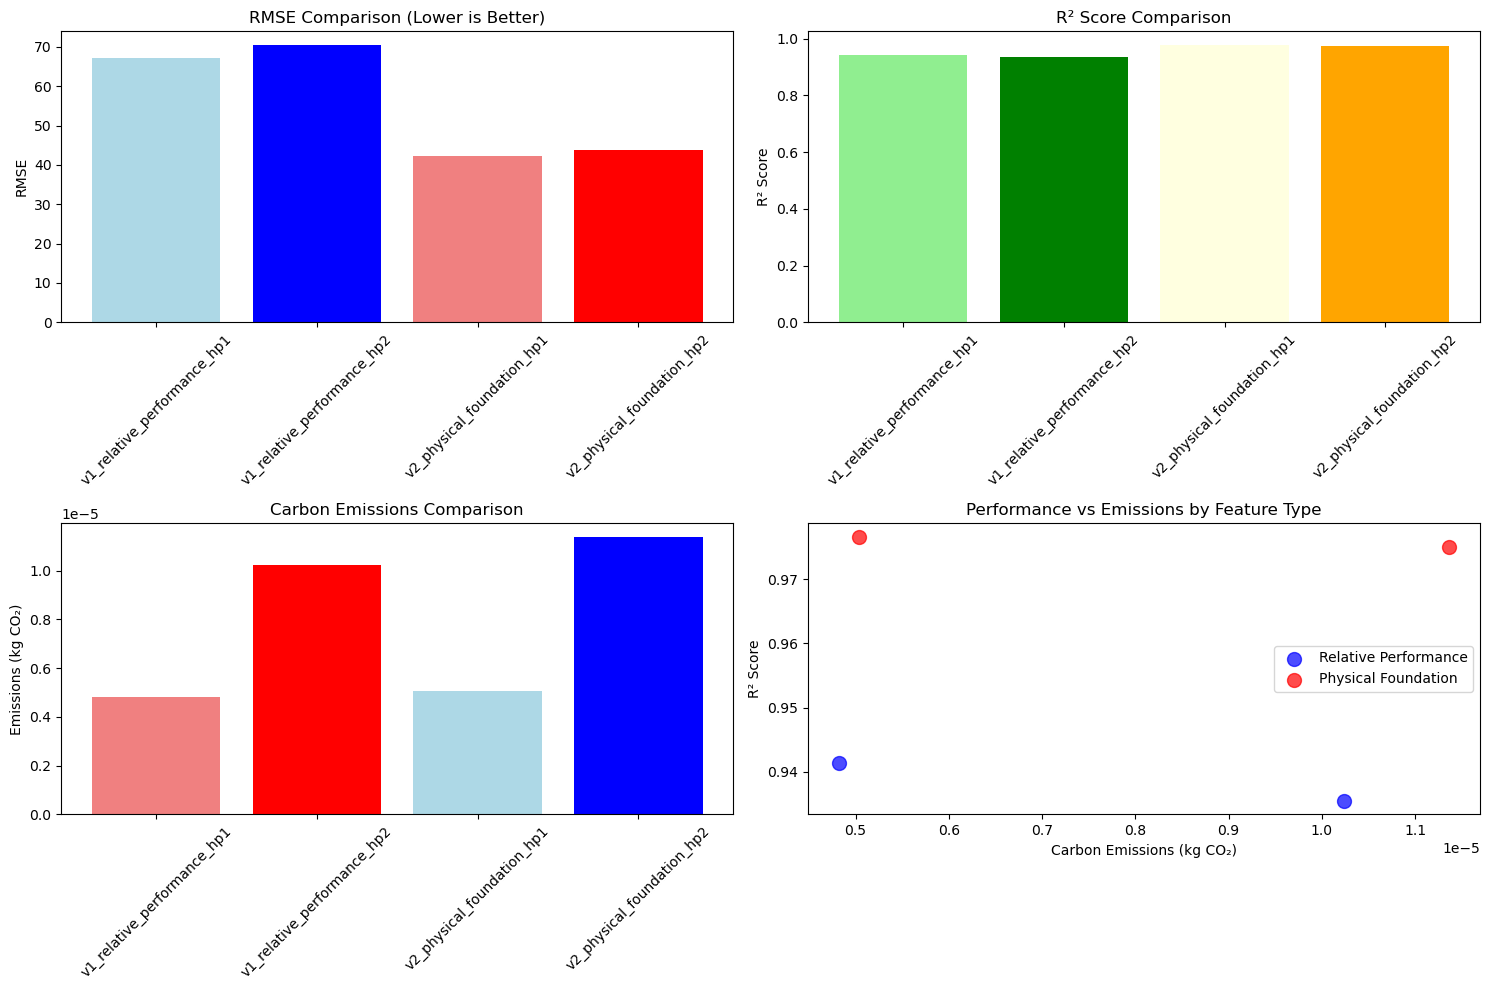

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. RMSE comparison
axes[0, 0].bar(results_df["run_name"], results_df["rmse"], 
               color=["lightblue", "blue", "lightcoral", "red"])
axes[0, 0].set_title("RMSE Comparison (Lower is Better)")
axes[0, 0].set_ylabel("RMSE")
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. R² comparison  
axes[0, 1].bar(results_df["run_name"], results_df["r2_score"], 
               color=["lightgreen", "green", "lightyellow", "orange"])
axes[0, 1].set_title("R² Score Comparison")
axes[0, 1].set_ylabel("R² Score")
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Carbon emissions
axes[1, 0].bar(results_df["run_name"], results_df["emissions_kg"], 
               color=["lightcoral", "red", "lightblue", "blue"])
axes[1, 0].set_title("Carbon Emissions Comparison")
axes[1, 0].set_ylabel("Emissions (kg CO₂)")
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Feature comparison scatter
rel_perf = results_df[results_df['feature_version']=='v1_relative_performance']
phys_found = results_df[results_df['feature_version']=='v2_physical_foundation']

axes[1, 1].scatter(rel_perf["emissions_kg"], rel_perf["r2_score"], 
                  c='blue', s=100, label='Relative Performance', alpha=0.7)
axes[1, 1].scatter(phys_found["emissions_kg"], phys_found["r2_score"], 
                  c='red', s=100, label='Physical Foundation', alpha=0.7)
axes[1, 1].set_xlabel("Carbon Emissions (kg CO₂)")
axes[1, 1].set_ylabel("R² Score")
axes[1, 1].set_title("Performance vs Emissions by Feature Type")
axes[1, 1].legend()

plt.tight_layout()
plt.show()


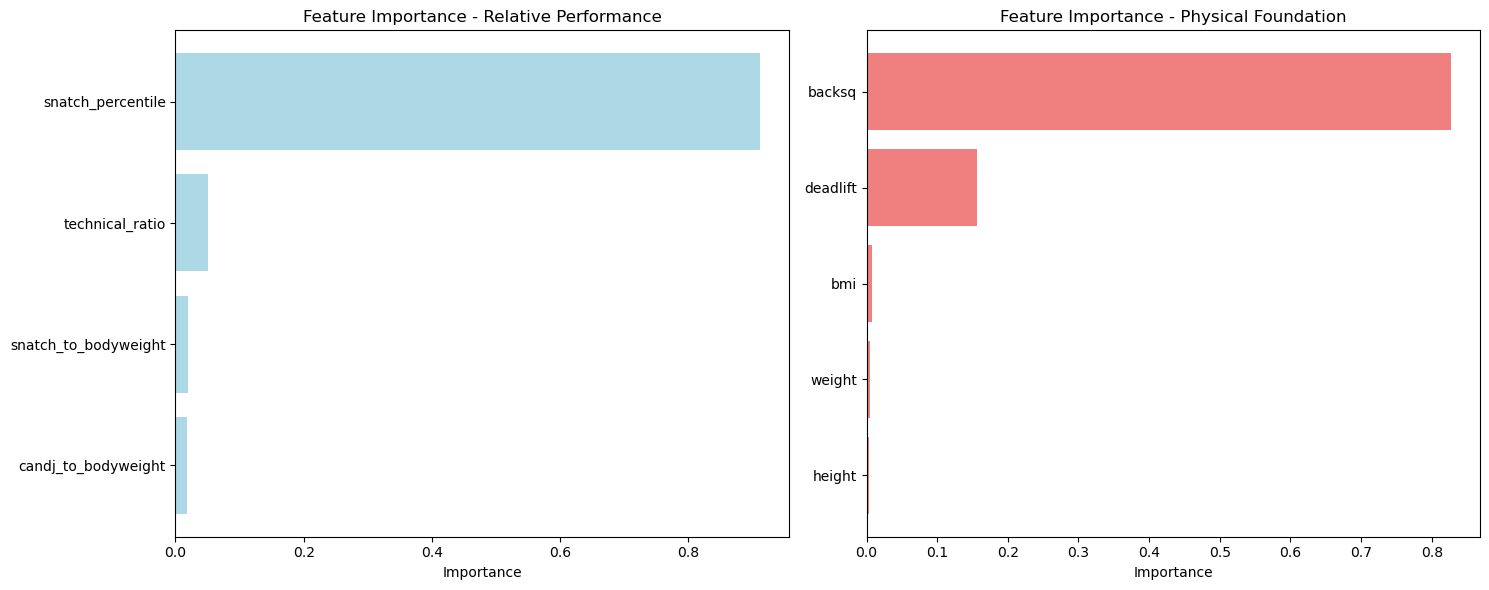


Top Features by Version:
V1 (Relative Performance): ['snatch_percentile', 'technical_ratio']
V2 (Physical Foundation): ['backsq', 'deadlift']


In [31]:
# Train models for feature importance
model_v1 = RandomForestRegressor(n_estimators=150, random_state=42)
model_v1.fit(features_v1, target)

model_v2 = RandomForestRegressor(n_estimators=150, random_state=42) 
model_v2.fit(features_v2, target)

# Plot feature importance
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# V1 Feature importance
importances_v1 = pd.Series(model_v1.feature_importances_, index=features_v1.columns).sort_values(ascending=True)
axes[0].barh(importances_v1.index, importances_v1.values, color='lightblue')
axes[0].set_title("Feature Importance - Relative Performance")
axes[0].set_xlabel("Importance")

# V2 Feature importance  
importances_v2 = pd.Series(model_v2.feature_importances_, index=features_v2.columns).sort_values(ascending=True)
axes[1].barh(importances_v2.index, importances_v2.values, color='lightcoral')
axes[1].set_title("Feature Importance - Physical Foundation")
axes[1].set_xlabel("Importance")

plt.tight_layout()
plt.show()

print("\nTop Features by Version:")
print("V1 (Relative Performance):", importances_v1.sort_values(ascending=False).head(2).index.tolist())
print("V2 (Physical Foundation):", importances_v2.sort_values(ascending=False).head(2).index.tolist())


Best Overall Model: v2_physical_foundation_hp1
Total Emissions: 0.000031 kg CO₂
Most Efficient: v1_relative_performance_hp1 (195257.60 R²/kg)

Key Insights:
• Relative performance features capture athlete efficiency
• Physical foundation features capture raw capacity
• Shows contrast between technical skill vs physical attributes
• Demonstrates advanced feature engineering capabilities


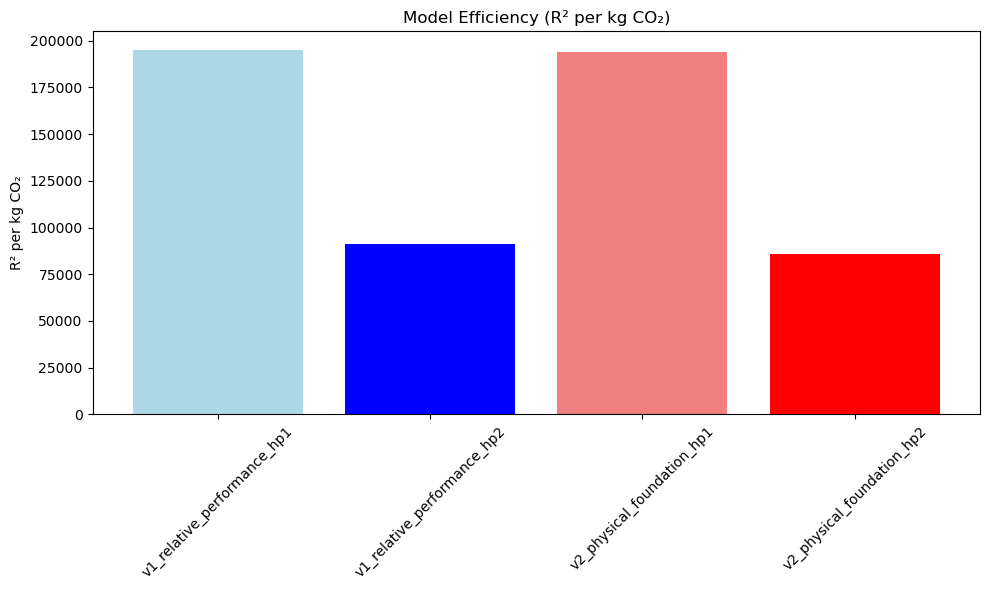

In [32]:
total_emissions = results_df['emissions_kg'].sum()
avg_emissions = results_df['emissions_kg'].mean()
efficiency = results_df['r2_score'] / results_df['emissions_kg']

print(f"Best Overall Model: {results_df.iloc[results_df['r2_score'].idxmax()]['run_name']}")
print(f"Total Emissions: {total_emissions:.6f} kg CO₂")
print(f"Most Efficient: {results_df.iloc[efficiency.idxmax()]['run_name']} ({efficiency.max():.2f} R²/kg)")

print(f"\nKey Insights:")
print(f"• Relative performance features capture athlete efficiency")
print(f"• Physical foundation features capture raw capacity") 
print(f"• Shows contrast between technical skill vs physical attributes")
print(f"• Demonstrates advanced feature engineering capabilities")

# Final efficiency visualization
plt.figure(figsize=(10, 6))
efficiency_data = results_df.copy()
efficiency_data['efficiency'] = efficiency_data['r2_score'] / efficiency_data['emissions_kg']

bars = plt.bar(efficiency_data["run_name"], efficiency_data['efficiency'], 
               color=['lightblue', 'blue', 'lightcoral', 'red'])
plt.title("Model Efficiency (R² per kg CO₂)")
plt.ylabel("R² per kg CO₂")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
